**Problem Statement:** The goal is to predict to the correct flight price based on the variables that you think are the right ones to make the prediction. The model's performance will be evaluated based on its ability to minimize the Root Mean Square Error (RMSE) between the model's predicted values and the actual flight prices.

**Hypothesis Generation:**

1. Last minute bookings will be more expensive.
2. Higher the distance between the cities higher the fare.
3. Some airlines are more expensive then other.
4. Journeys on weekends and starting of the week are expensive.
5. During holidays prices sky rocket.

**Data Dictionary:**
The columns are as follows:

Flight_ID: A unique identifier for each flight.

Airline: The airline operating the flight.

Departure_City: The city from which the flight departs.

Arrival_City: The city where the flight arrives.

Distance: The distance between the departure and arrival cities (in kilometers).

Departure_Time: The time of day when the flight departs (in 24-hour format).

Arrival_Time: The time of day when the flight arrives (in 24-hour format).

Duration: The duration of the flight (in hours).

Aircraft_Type: The type of aircraft used for the flight.

Number_of_Stops: The number of stops during the journey.

Day_of_Week: The day of the week when the flight takes place.

Month_of_Travel: The month when the flight takes place.

Holiday_Season: Indication of whether the flight occurs during a holiday or a specific season.

Demand: A metric representing the demand for flights on that specific route.

Weather_Conditions: Weather conditions during the flight.

Passenger_Count: The number of passengers on the flight.

Promotion_Type: The type of promotion offered for the flight.

Fuel_Price: The cost of fuel (per liter), which can significantly influence ticket prices.

Flight_Price: The price of the flight ticket.

**Hypothesis Mapping:**

1. Data Not available.

2. Distance

3. Airline

4. Day_of_The_Week

5. Holiday_Season

We have 19 variables I felt 5 important parameters, out of 5 we have 4 parameters. lets figure out which are more important features for fare prediction.

In [ ]:
# Loading the dataset
import pandas as pd
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [ ]:
# Check the data
df_train.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,NaN,Greenshire,8286.0,8:23,20:19,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,20:28,1:45,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,11:30,15:54,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,NaN,0.52,442.17
3,F4,NaN,Blakefort,Crosbyberg,3145.0,20:24,1:21,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,21:59,6:04,8.09,Boeing 737,1,Thursday,January,None,NaN,Clear,181,None,1.09,804.35


In [ ]:
df_test.head()

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price
0,F45001,Airline B,Davidstad,Moorebury,3096.0,18:43,0:14,5.52,Boeing 737,1,Saturday,August,Summer,Medium,Clear,110,None,0.95
1,F45002,Airline A,Lake Tyler,Camachoberg,8760.0,1:16,13:04,11.80,Airbus A380,1,Thursday,April,None,High,Clear,295,Discount,1.05
2,F45003,Airline C,New Carol,West Ryanfurt,6365.0,12:17,21:52,9.59,Boeing 777,1,Sunday,January,None,Low,Rain,223,Discount,0.63
3,F45004,Airline A,Richardsonshire,Jordanburgh,7836.0,0:11,10:23,10.21,Airbus A380,0,Thursday,March,None,Low,Rain,223,None,0.88
4,F45005,Airline B,Tiffanytown,Morganstad,1129.0,3:22,5:13,1.86,Airbus A320,1,Saturday,August,Summer,High,Cloudy,145,Special Offer,1.11


In [ ]:
# Display basic information about the dataset
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Flight_ID           45000 non-null  object 
 1   Airline             41427 non-null  object 
 2   Departure_City      44660 non-null  object 
 3   Arrival_City        44814 non-null  object 
 4   Distance            44909 non-null  float64
 5   Departure_Time      45000 non-null  object 
 6   Arrival_Time        45000 non-null  object 
 7   Duration            45000 non-null  float64
 8   Aircraft_Type       44957 non-null  object 
 9   Number_of_Stops     45000 non-null  int64  
 10  Day_of_Week         44775 non-null  object 
 11  Month_of_Travel     44733 non-null  object 
 12  Holiday_Season      45000 non-null  object 
 13  Demand              44683 non-null  object 
 14  Weather_Conditions  44698 non-null  object 
 15  Passenger_Count     45000 non-null  int64  
 16  Prom

In [ ]:
# Summary statistics
print(df_train.describe())

           Distance      Duration  Number_of_Stops  Passenger_Count  \
count  44909.000000  45000.000000     45000.000000     45000.000000   
mean    5482.238727      7.852555         0.665667       174.928822   
std     2594.847860      3.292880         0.750578        72.372980   
min     1000.000000      1.280000         0.000000        50.000000   
25%     3230.000000      5.040000         0.000000       112.000000   
50%     5476.000000      7.840000         1.000000       175.000000   
75%     7725.000000     10.650000         1.000000       238.000000   
max    10000.000000     14.450000         3.000000       300.000000   

         Fuel_Price  Flight_Price  
count  44910.000000  45000.000000  
mean       0.850192    574.606270  
std        0.201736    160.239344  
min        0.500000    173.350000  
25%        0.680000    455.297500  
50%        0.850000    565.750000  
75%        1.020000    679.692500  
max        1.200000   1261.640000  


In [ ]:
#Check for the null values in both the train and test datasets.
df_train.isnull().sum()

Flight_ID                0
Airline               3573
Departure_City         340
Arrival_City           186
Distance                91
Departure_Time           0
Arrival_Time             0
Duration                 0
Aircraft_Type           43
Number_of_Stops          0
Day_of_Week            225
Month_of_Travel        267
Holiday_Season           0
Demand                 317
Weather_Conditions     302
Passenger_Count          0
Promotion_Type         403
Fuel_Price              90
Flight_Price             0
dtype: int64

In [ ]:
df_test.isnull().sum()

Flight_ID               0
Airline               427
Departure_City         39
Arrival_City           30
Distance                9
Departure_Time          0
Arrival_Time            0
Duration                0
Aircraft_Type           8
Number_of_Stops         0
Day_of_Week            25
Month_of_Travel        34
Holiday_Season          0
Demand                 34
Weather_Conditions     49
Passenger_Count         0
Promotion_Type         49
Fuel_Price             10
dtype: int64

In [ ]:
# Impute categorical columns with mode
categorical_columns = ["Airline", "Departure_City", "Arrival_City", "Aircraft_Type", "Day_of_Week", "Month_of_Travel","Demand", "Weather_Conditions", "Promotion_Type"]
df_train[categorical_columns] = df_train[categorical_columns].fillna(df_train[categorical_columns].mode().iloc[0])

# Impute numerical columns with median
numerical_columns = ["Distance", "Passenger_Count", "Fuel_Price", "Flight_Price"]
df_train[numerical_columns] = df_train[numerical_columns].fillna(df_train[numerical_columns].median())

# Impute Holiday_Season
df_train["Holiday_Season"] = df_train["Holiday_Season"].fillna("Not a Holiday")

In [ ]:
#Check for the null values in both the train and test datasets.
df_train.isnull().sum()

Flight_ID             0
Airline               0
Departure_City        0
Arrival_City          0
Distance              0
Departure_Time        0
Arrival_Time          0
Duration              0
Aircraft_Type         0
Number_of_Stops       0
Day_of_Week           0
Month_of_Travel       0
Holiday_Season        0
Demand                0
Weather_Conditions    0
Passenger_Count       0
Promotion_Type        0
Fuel_Price            0
Flight_Price          0
dtype: int64

In [ ]:
# Impute categorical columns with mode
categorical_columns = ["Airline", "Departure_City", "Demand", "Arrival_City", "Aircraft_Type", "Day_of_Week", "Month_of_Travel", "Weather_Conditions", "Promotion_Type"]
df_test[categorical_columns] = df_test[categorical_columns].fillna(df_test[categorical_columns].mode().iloc[0])

# Impute numerical columns with median
numerical_columns = ["Distance","Passenger_Count", "Fuel_Price"]
df_test[numerical_columns] = df_test[numerical_columns].fillna(df_test[numerical_columns].median())

# Impute Holiday_Season
df_test["Holiday_Season"] = df_test["Holiday_Season"].fillna("Not a Holiday")

In [ ]:
#Check for the null values in both the train and test datasets.
df_test.isnull().sum()

Flight_ID             0
Airline               0
Departure_City        0
Arrival_City          0
Distance              0
Departure_Time        0
Arrival_Time          0
Duration              0
Aircraft_Type         0
Number_of_Stops       0
Day_of_Week           0
Month_of_Travel       0
Holiday_Season        0
Demand                0
Weather_Conditions    0
Passenger_Count       0
Promotion_Type        0
Fuel_Price            0
dtype: int64

It is safe to assume that both the train and test datasets have impurities and null values.


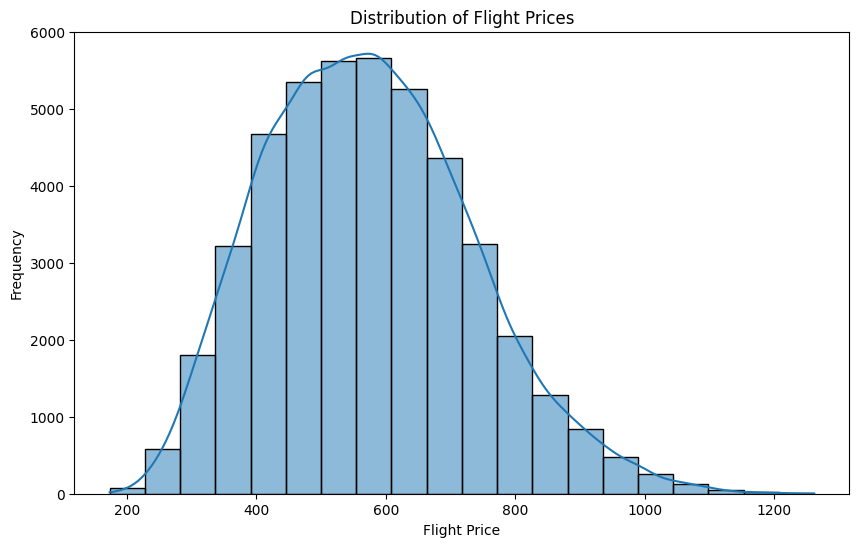

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of Flight Prices
plt.figure(figsize=(10, 6))
sns.histplot(df_train["Flight_Price"], bins=20, kde=True)
plt.title("Distribution of Flight Prices")
plt.xlabel("Flight Price")
plt.ylabel("Frequency")
plt.show()


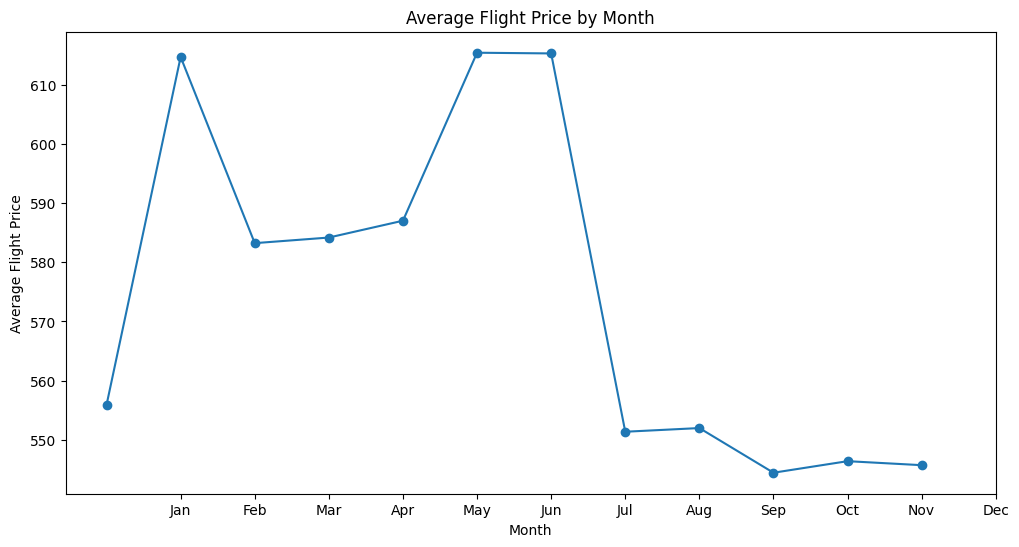

In [ ]:
# Time Series Analysis (if applicable)
# Assuming you have extracted day and month from Departure_Time
plt.figure(figsize=(12, 6))
df_train.groupby("Month_of_Travel")["Flight_Price"].mean().plot(marker='o')
plt.title("Average Flight Price by Month")
plt.xlabel("Month")
plt.ylabel("Average Flight Price")
plt.xticks(range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

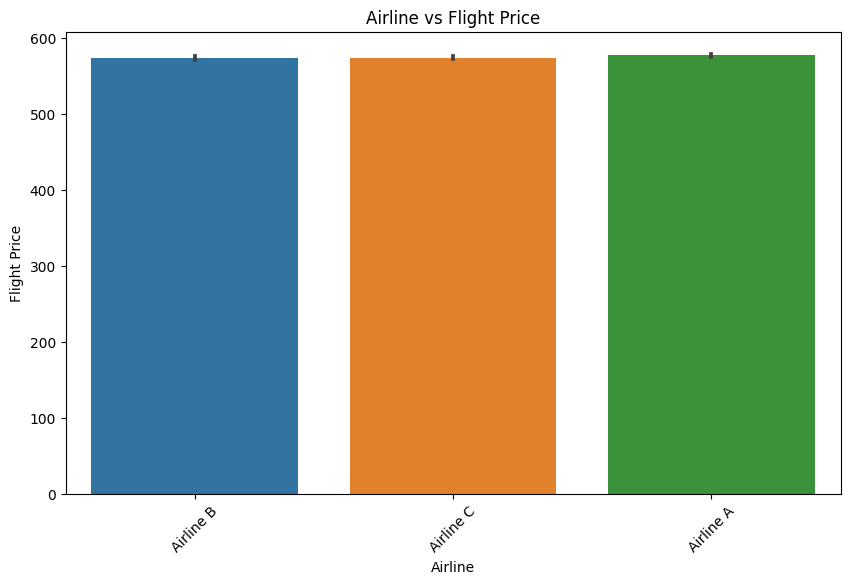

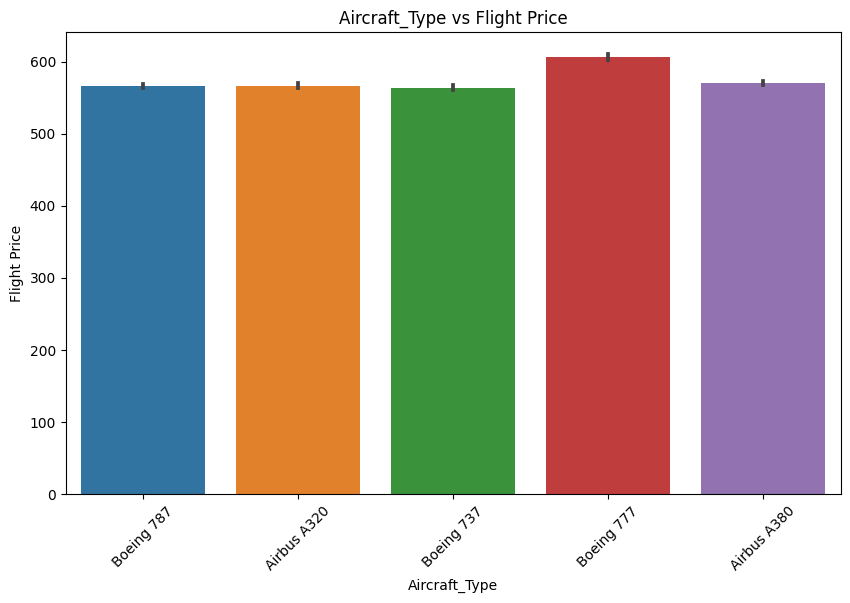

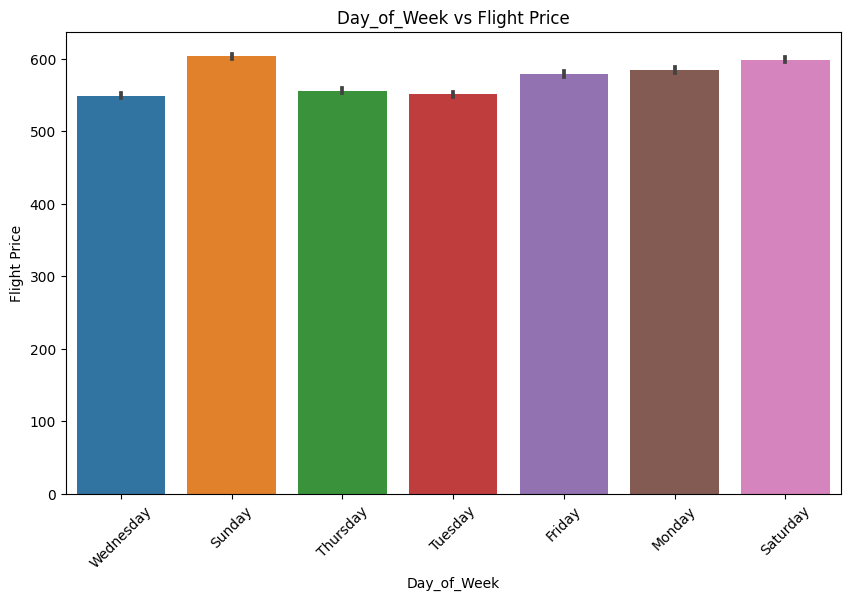

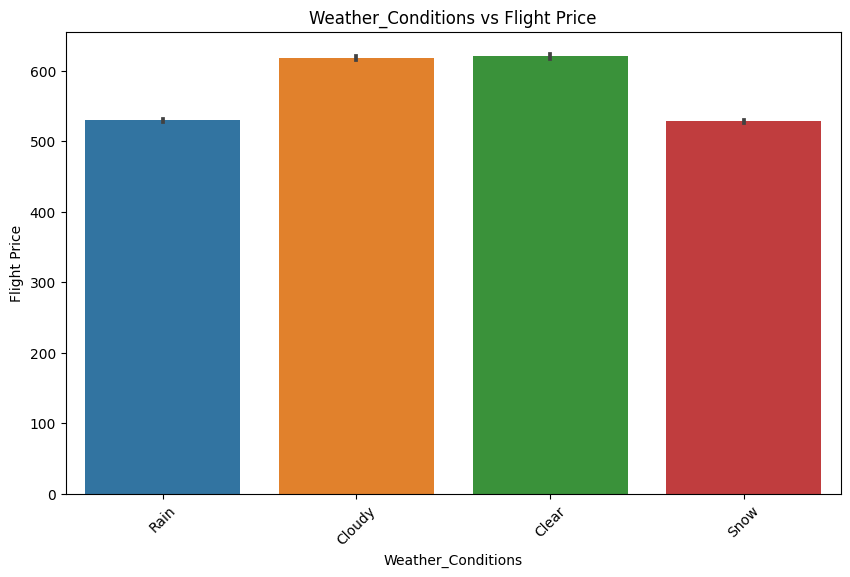

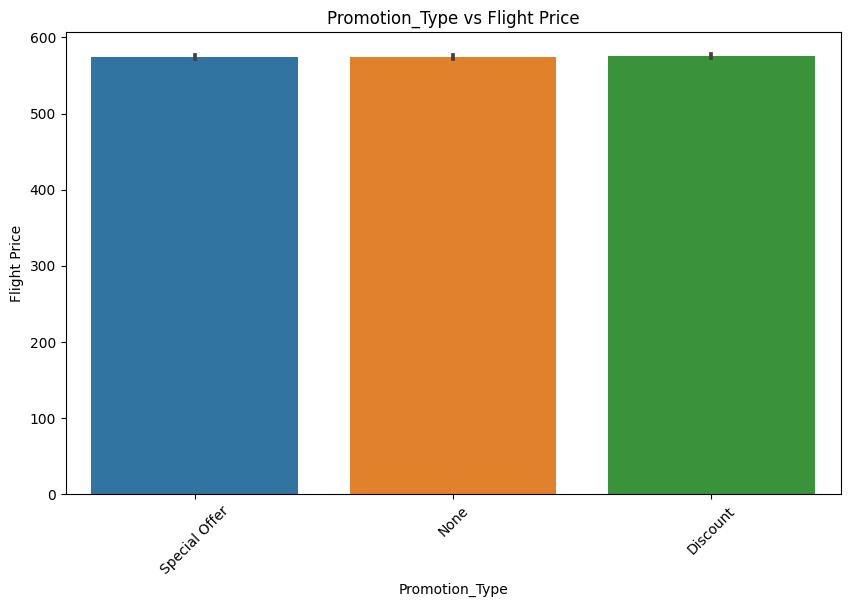

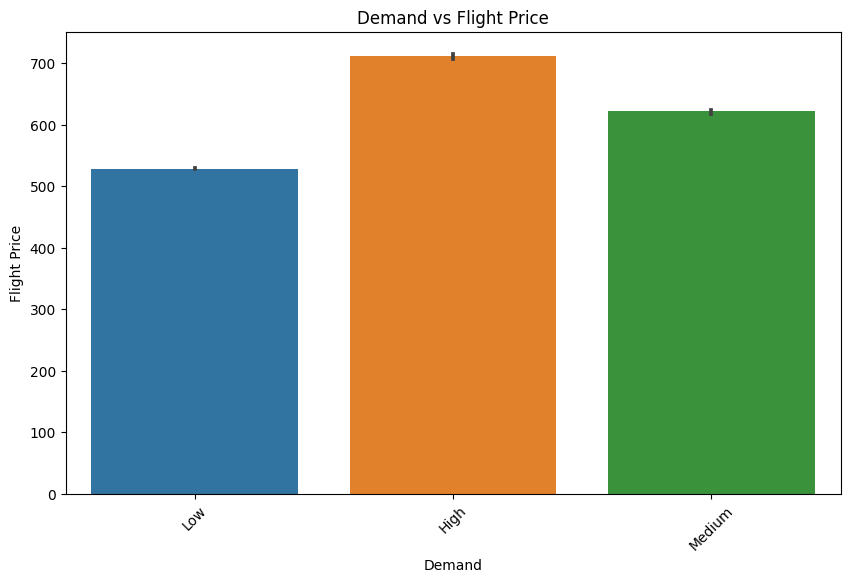

In [ ]:
# Categorical Features Analysis
categorical_columns = ["Airline","Aircraft_Type", "Day_of_Week", "Weather_Conditions", "Promotion_Type", "Demand"]
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column, y="Flight_Price", data=df_train)
    plt.title(f"{column} vs Flight Price")
    plt.xticks(rotation=45)
    plt.ylabel("Flight Price")
    plt.show()


<ipython-input-16-7a30b8cc5946>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr()


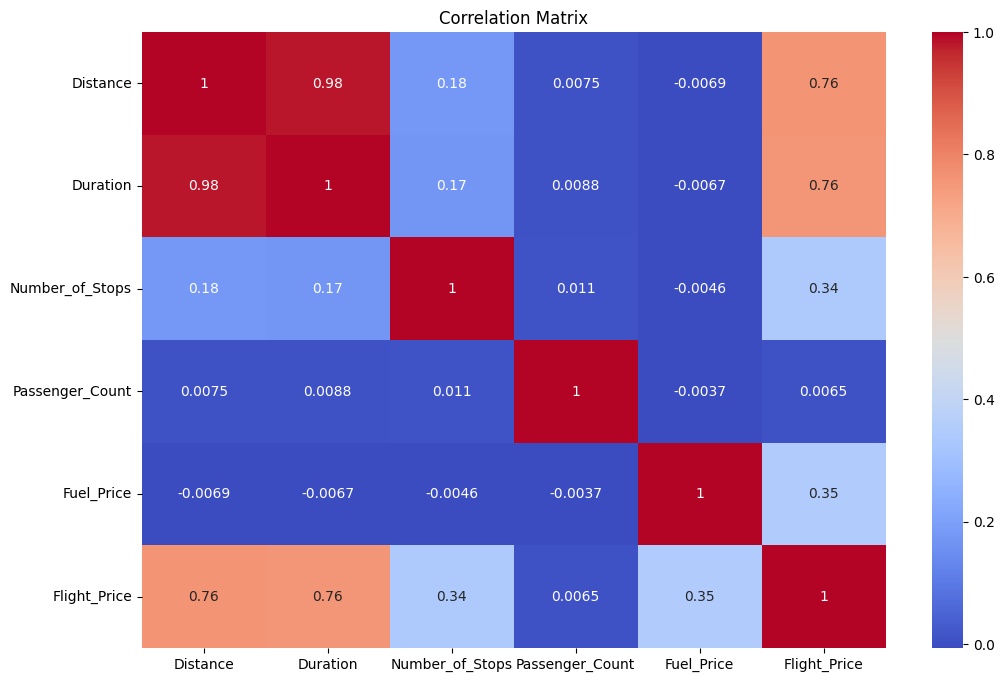

In [ ]:
# Correlation Matrix
corr_matrix = df_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Data Preprocessing
# Apply One-Hot Encoding to categorical columns
categorical_columns = ["Airline", "Departure_City", "Arrival_City", "Aircraft_Type", "Day_of_Week", "Month_of_Travel", "Weather_Conditions", "Promotion_Type"]
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
encoded_features = encoder.fit_transform(df_train[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Combine encoded features with original numeric features
X = pd.concat([df_train.drop(categorical_columns, axis=1), encoded_df], axis=1)
y = df_train["Flight_Price"]

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection and Training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
